# <center><h1 style="color:'blue';background-color:cyan">Foreign Direct investment Analysis</h1></center>
<h2> By: Shalini Pal</h2>

Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [2]:
fdi_data = pd.read_csv("FDI data.csv")

In [3]:
fdi_data.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [4]:
# Checking if there are null values
fdi_data.isnull().sum() #there are no null values in the dataset

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [5]:
# Checking for duplicated data
fdi_data.duplicated().sum() #there are no duplicates values in the dataset

0

In [6]:
fdi_data.shape #63 rows and 18 columns

(63, 18)

In [7]:
fdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [8]:
fdi_data.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

Reshaping data for easy analysis.

In [9]:
Sector = ['Sector']
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05','2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11','2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']

In [10]:
fdi_melted = pd.melt(fdi_data,id_vars = Sector, value_vars=Year,var_name='Year',value_name='FDI($)',ignore_index=True)
fdi_melted

,Sector,Year,FDI($)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [11]:
fdi_melted.columns

Index(['Sector', 'Year', 'FDI($)'], dtype='object')

In [12]:
fdi_final = fdi_melted[['Sector', 'Year', 'FDI($)']].replace(['PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)','INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)','AIR TRANSPORT (INCLUDING AIR FREIGHT)','CHEMICALS (OTHER THAN FERTILIZERS)','PAPER AND PULP (INCLUDING PAPER PRODUCTS)','SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)','TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)','PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)','CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects'],['PRIME MOVER','INFORMATION & BROADCASTING','AIR TRANSPORT','CHEMICALS','PAPER AND PULP','SERVICES SECTOR','TEA AND COFFEE','PRINTING OF BOOKS','CONSTRUCTION DEVELOPMENT'])

In [13]:
fdi_final = fdi_final[['Sector', 'Year', 'FDI($)']].replace(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06','2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12','2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])

In [14]:
fdi_final['Sector'].unique()

array(['METALLURGICAL INDUSTRIES', 'MINING', 'POWER',
       'NON-CONVENTIONAL ENERGY', 'COAL PRODUCTION',
       'PETROLEUM & NATURAL GAS', 'BOILERS AND STEAM GENERATING PLANTS',
       'PRIME MOVER', 'ELECTRICAL EQUIPMENTS',
       'COMPUTER SOFTWARE & HARDWARE', 'ELECTRONICS',
       'TELECOMMUNICATIONS', 'INFORMATION & BROADCASTING',
       'AUTOMOBILE INDUSTRY', 'AIR TRANSPORT', 'SEA TRANSPORT', 'PORTS',
       'RAILWAY RELATED COMPONENTS', 'INDUSTRIAL MACHINERY',
       'MACHINE TOOLS', 'AGRICULTURAL MACHINERY',
       'EARTH-MOVING MACHINERY',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS',
       'MEDICAL AND SURGICAL APPLIANCES', 'INDUSTRIAL INSTRUMENTS',
       'SCIENTIFIC INSTRUMENTS',
       'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS', 'FERTILIZERS',
       'CHEMICALS', 'PHOTOGRAPHIC RAW FILM AND PAPER', 'DYE-STUFFS',
       'DRUGS & PHARMACEUTICALS', 'TEXTILES (INCLUDING DYED,PRINTED)',
       'PAPER AND 

In [15]:
fdi_final['Year'] = fdi_final['Year'].astype(int)

In [16]:
fdi_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  1071 non-null   object 
 1   Year    1071 non-null   int32  
 2   FDI($)  1071 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 21.0+ KB


# Visualization

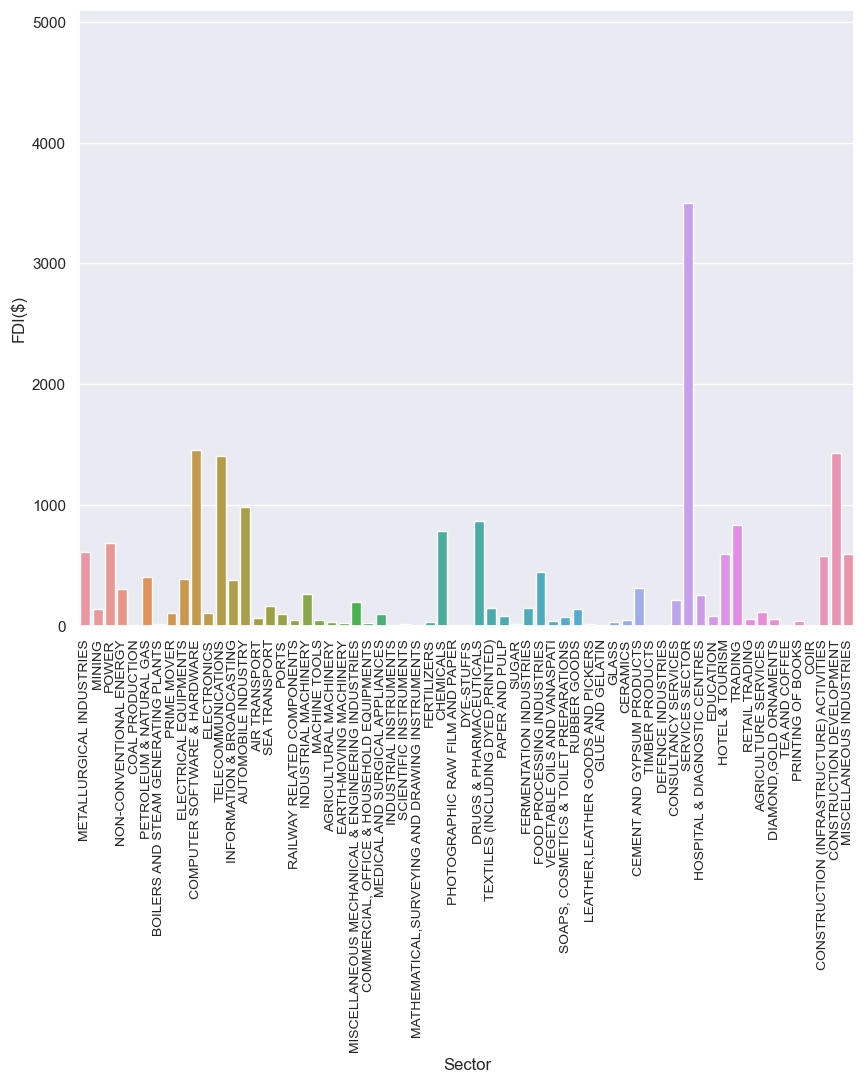

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(data=fdi_final, x='Sector', y='FDI($)',errwidth=0)
plt.title("")
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [18]:
sorted_fdi_final = fdi_final.sort_values(by='FDI($)', ascending=False)

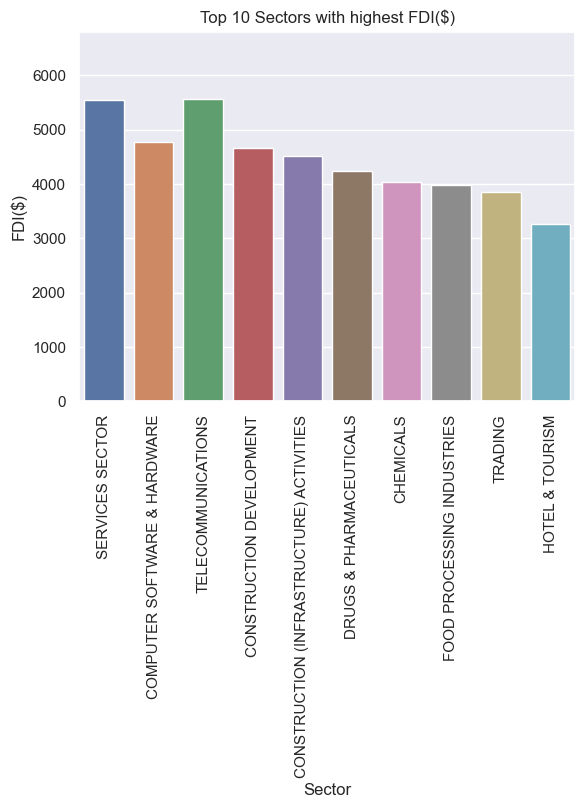

In [19]:
sns.barplot(data=sorted_fdi_final.head(22),x='Sector',y='FDI($)',errwidth=0)
plt.xticks(rotation=90)
plt.title('Top 10 Sectors with highest FDI($)')
plt.show()

In [20]:
sorted_fdi_final['Sector'].head(22).unique()

array(['SERVICES SECTOR', 'COMPUTER SOFTWARE & HARDWARE',
       'TELECOMMUNICATIONS', 'CONSTRUCTION DEVELOPMENT',
       'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
       'DRUGS & PHARMACEUTICALS', 'CHEMICALS',
       'FOOD PROCESSING INDUSTRIES', 'TRADING', 'HOTEL & TOURISM'],
      dtype=object)

In [21]:
fdi_final.groupby('Year')['FDI($)'].sum()

Year
2001     2378.71
2002     4027.69
2003     2704.32
2004     2187.85
2005     3218.69
2006     5539.75
2007    12491.76
2008    24575.40
2009    31395.96
2010    25834.38
2011    21383.07
2012    35120.78
2013    22423.59
2014    24299.32
2015    30930.47
2016    40000.99
2017    43478.26
Name: FDI($), dtype: float64

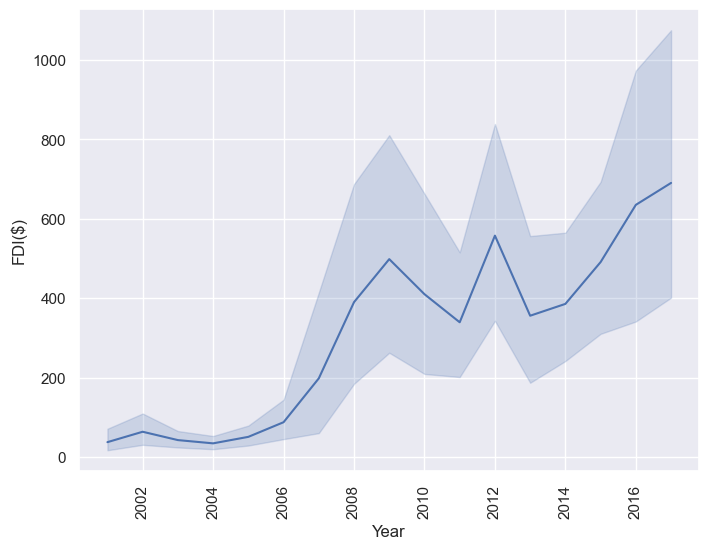

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(data=fdi_final, x='Year', y='FDI($)')
plt.xticks(rotation=90)
plt.show()

In [23]:
percent_growth = fdi_final[['Year','FDI($)']]
percent_growth = percent_growth.groupby('Year').sum()
percent_growth['% growth over previous year'] = round(percent_growth.pct_change()*100,2)
percent_growth

,FDI($),% growth over previous year
Year,,
2001,2378.71,NaN
2002,4027.69,69.32
2003,2704.32,-32.86
2004,2187.85,-19.10
2005,3218.69,47.12
2006,5539.75,72.11
2007,12491.76,125.49
2008,24575.40,96.73
2009,31395.96,27.75


Studying the year - 2017 which has the highest FDI

In [24]:
fdi_2017 = fdi_final[fdi_final['Year']==2017].sort_values(by='FDI($)',ascending=False).head(10)
fdi_2017

,Sector,Year,FDI($)
1057,SERVICES SECTOR,2017,8684.07
1019,TELECOMMUNICATIONS,2017,5563.69
1017,COMPUTER SOFTWARE & HARDWARE,2017,3651.71
1061,TRADING,2017,2338.40
1016,ELECTRICAL EQUIPMENTS,2017,2230.69
1053,CEMENT AND GYPSUM PRODUCTS,2017,2130.10
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2017,1860.73
1021,AUTOMOBILE INDUSTRY,2017,1609.32
1020,INFORMATION & BROADCASTING,2017,1516.68
1008,METALLURGICAL INDUSTRIES,2017,1440.18


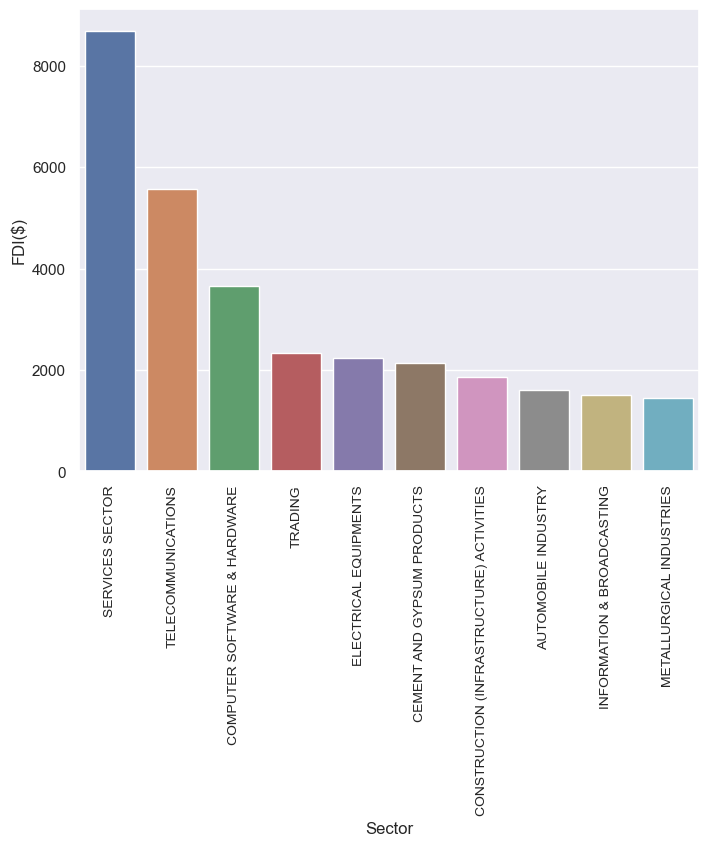

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(fdi_2017,x='Sector',y='FDI($)')
plt.xticks(rotation=90,fontsize=10)
plt.show()

# Observation

<br>1. Analysis of Foreign Direct Investment (FDI) trends from 2000 to 2017 reveals interesting insights into sectoral preferences and investment patterns. The data showcases a fluctuating trajectory of FDI inflows across various sectors, with notable shifts observed over the years.<br><br>
2.<i>SERVICES,COMPUTER SOFTWARE & HARDWARE,TELECOMMUNICATIONS,CONSTRUCTION DEVELOPMENT,CONSTRUCTION INFRASTRUCTURE ACTIVITIES,DRUGS & PHARMACEUTICALS,CHEMICALS,FOOD PROCESSING INDUSTRIES,TRADING and HOTEL & TOURISM </i>are the top 10 sectors that which have highest Foreign Direct Investment.<br><br>
3.In the data provided from 2000 to 2017, the largest investments were made in the <b>Service Sectors</b> with a total of 59476.49 dollars <br><br>
4. From 2001 to 2017, there has been a steady increase in foreign direct investment (FDI) across various sectors in the economy. Notably, there was a significant surge in FDI from 2007 onwards, with the highest FDI observed in 2017. Sectors such as Financial services,computer software & hardware, telecommunications, and Construction development and Infrastructure have consistently attracted higher FDI compared to others. This trend indicates a growing interest from foreign investors in technology-driven and infrastructure-related sectors, contributing to the overall economic development of the country.<br><br>
5. Starting from 2000, the FDI has increased from the year 2000 up until 2009 with amounts ranging from 2378$ to 31395$<br><br>
6. In 2009, the investment level dropped from 31395$ to  25834$ and then to 21383$ for 2 years,up until 2012 where FDI rised a bit to 35120$ and dropped by 36% in the following year.<br><br>
7. After 2013, the FDI has continuously increased gradually overtime upto 2017 with an average percentage increase of 24%<br><br>

In [26]:
fdi_final.to_csv("FDI_Final.csv")

In [27]:
fdi_final.columns

Index(['Sector', 'Year', 'FDI($)'], dtype='object')

# Machine Learning Algorithm 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [42]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sector' column
fdi_final['Sector_encoded'] = label_encoder.fit_transform(fdi_final['Sector'])
fdi_final

,Sector,Year,FDI($),Sector_encoded
0,METALLURGICAL INDUSTRIES,2001,22.69,37
1,MINING,2001,1.32,38
2,POWER,2001,89.42,46
3,NON-CONVENTIONAL ENERGY,2001,0.00,41
4,COAL PRODUCTION,2001,0.00,8
...,...,...,...,...
1066,PRINTING OF BOOKS,2017,53.17,48
1067,COIR,2017,0.00,9
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2017,1860.73,12
1069,CONSTRUCTION DEVELOPMENT,2017,105.14,13


In [39]:
X = fdi_final[['Sector_encoded','Year']]
y = fdi_final['FDI($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Printing the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Mean Squared Error: 656996.5703964385
Intercept: -83663.16051645472
Coefficient: [ 1.08202062 41.78241654]


In [44]:
model.predict([[38,2017]])

array([653.09042978])